In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dark_horse = cv2.imread('Computer-Vision-with-Python/DATA/horse.jpg') # ORIGINAL BGR OPENCV
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) # CONVERTED TO RGB

rainbow = cv2.imread('Computer-Vision-with-Python/DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('Computer-Vision-with-Python/DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

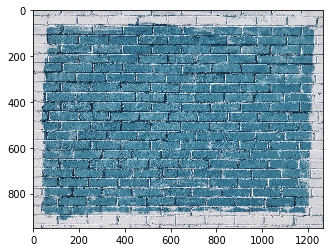

In [6]:
plt.imshow(show_bricks)

In [8]:
# CREATING HISTOGRAM FOR THE BLUE COLOR
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_values.shape

(256, 1)

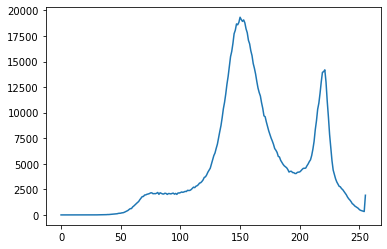

In [9]:
plt.plot(hist_values)

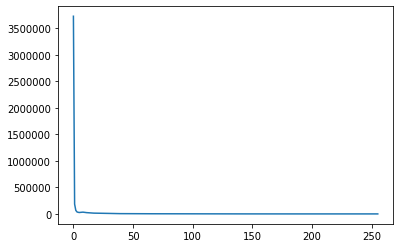

In [10]:
# the horse image has almost no blue
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE BRICKS')

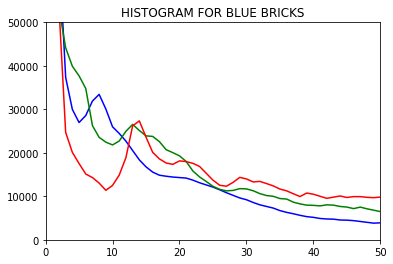

In [18]:
# show all histograms at the same time
img = dark_horse
color = ('b', 'g', 'r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,50])
    plt.ylim([0,50000])
    
plt.title('HISTOGRAM FOR BLUE BRICKS')


# HISTOGRAM EQUALIZATION
## applying histogram equalization will reduce the color depth (in-between colors or shades)

In [19]:
img = rainbow
img.shape

(550, 413, 3)

In [21]:
mask = np.zeros(img.shape[:2],np.uint8)
mask.shape

(550, 413)

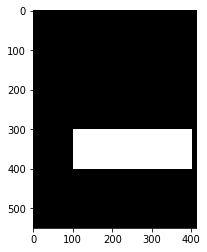

In [23]:
mask[300:400,100:400] = 255
plt.imshow(mask, cmap='gray')


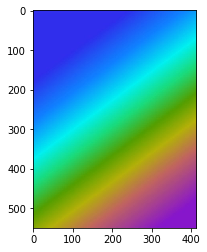

In [24]:
plt.imshow(rainbow)


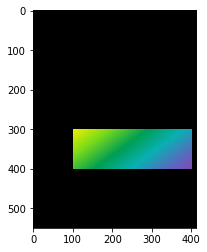

In [25]:
masked_img = cv2.bitwise_and(img,img,mask=mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask) # for visualization
plt.imshow(show_masked_img)

In [26]:
# B G R
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])


Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW')

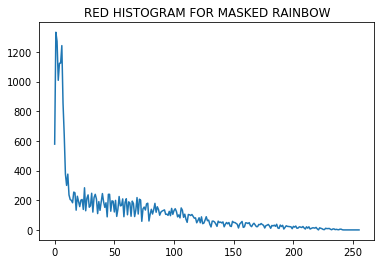

In [27]:
plt.plot(hist_mask_values_red)
plt.title('RED HISTOGRAM FOR MASKED RAINBOW')

Text(0.5, 1.0, 'RED HISTOGRAM FOR NORMAL RAINBOW')

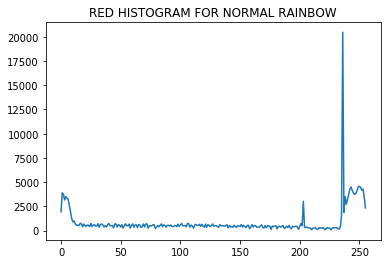

In [28]:
# a lot more red
plt.plot(hist_values_red)
plt.title('RED HISTOGRAM FOR NORMAL RAINBOW')

In [29]:
gorilla = cv2.imread('Computer-Vision-with-Python/DATA/gorilla.jpg',0)


In [30]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

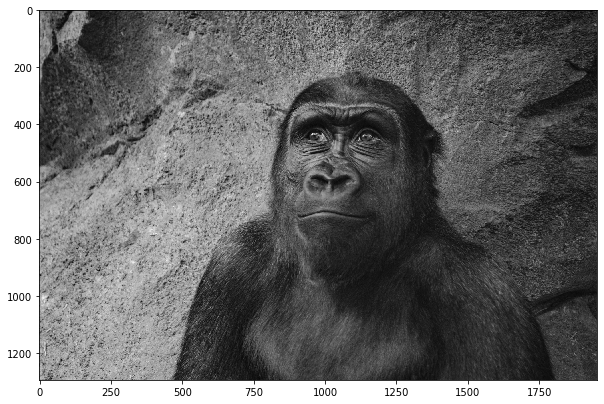

In [32]:
display(gorilla,cmap='gray')

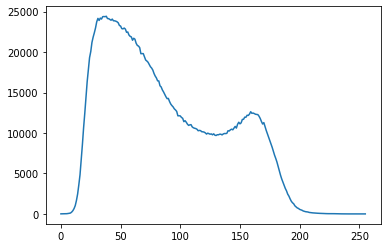

In [33]:
hist_values = cv2.calcHist([gorilla],[0],None,[256],[0,256])
plt.plot(hist_values)

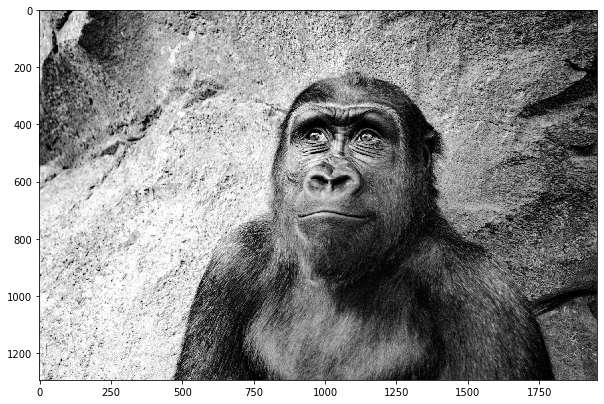

In [36]:
# equalized gorilla
eq_gorilla = cv2.equalizeHist(gorilla)
display(eq_gorilla,cmap='gray')

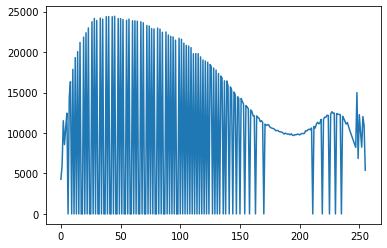

In [37]:
hist_values = cv2.calcHist([eq_gorilla],[0],None,[256],[0,256])
plt.plot(hist_values)

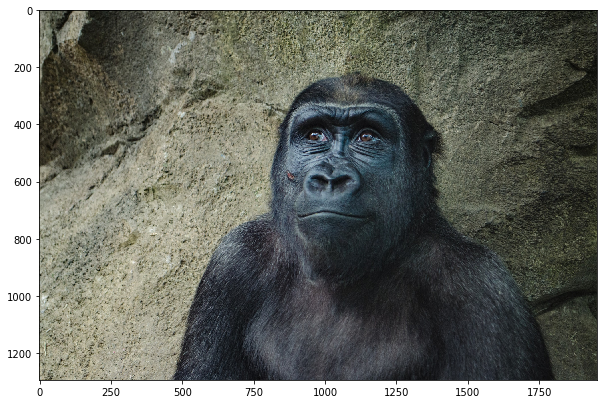

In [40]:
color_gorilla = cv2.imread('Computer-Vision-with-Python/DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
display(show_gorilla)

In [42]:
# translate to HSV
hsv = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)
hsv[:,:,2] 

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

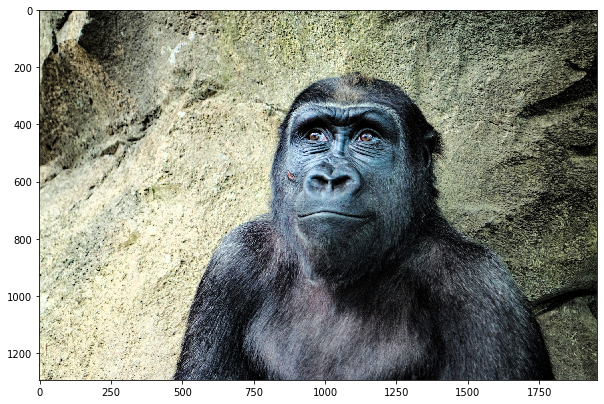

In [44]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)